In [1]:
from experiments.hierarchical_clustering import HCA
from experiments import davies_bouldin as DB 
from sklearn import metrics as mcs

In [2]:
PORTO_TRUE_SIMS_DTW = "../code/benchmarks/similarities/porto-dtw.csv"
PORTO_TRUE_SIMS_FRE = "../code/benchmarks/similarities/porto-frechet.csv"
PORTO_GRID_SIMS = "../code/experiments/similarities/grid_porto.csv"
PORTO_DISK_SIMS = "../code/experiments/similarities/disk_porto.csv"


In [3]:
# Adding this cell as the clustering algorithm generates warnings that we are unable to deal with and not interested in seeing. 

def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

___

# First, generating all four figures over Porto

The following cells contain clustering figures over Porto
  1. Porto DTW
  2. Porto Frechet
  3. Porto Grid similarities
  4. Porto Disk similarities
  5. Davies Bouldin over the aforementioned

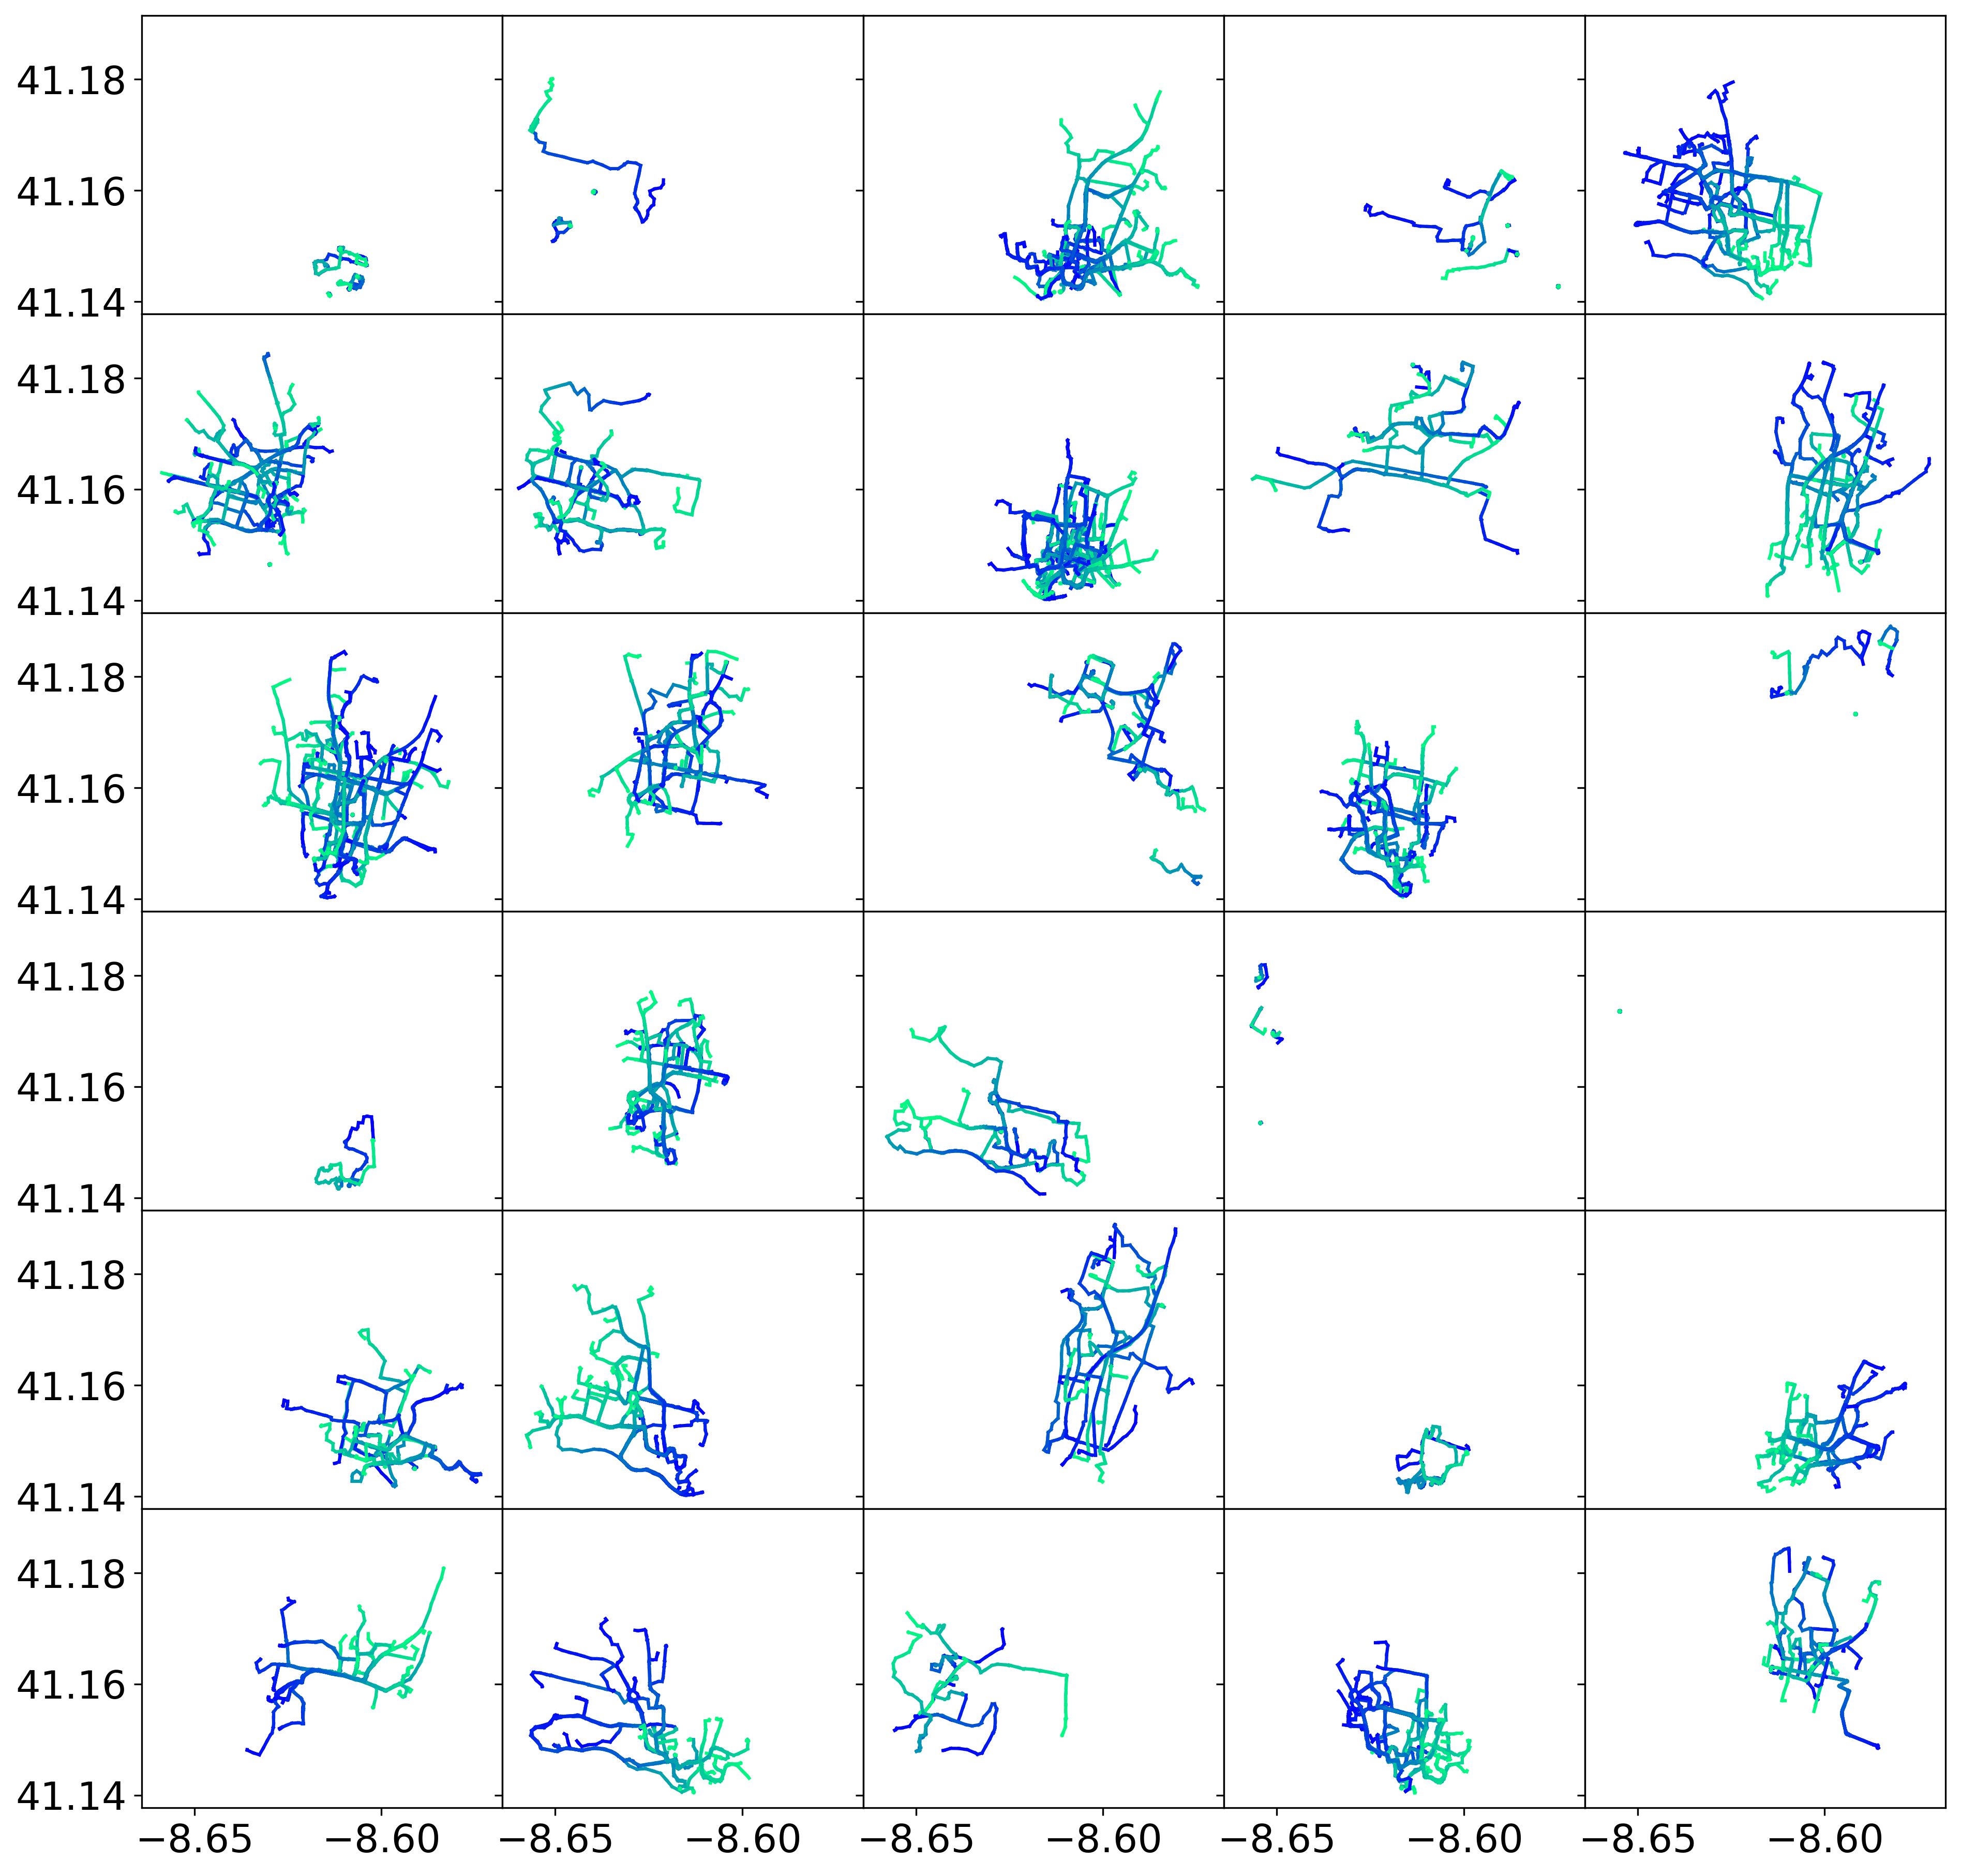

In [4]:
# Porto DTW
PortoDTW = HCA("Porto", PORTO_TRUE_SIMS_DTW, 30 )
PortoDTW.plot_clusters("Porto - DTW")

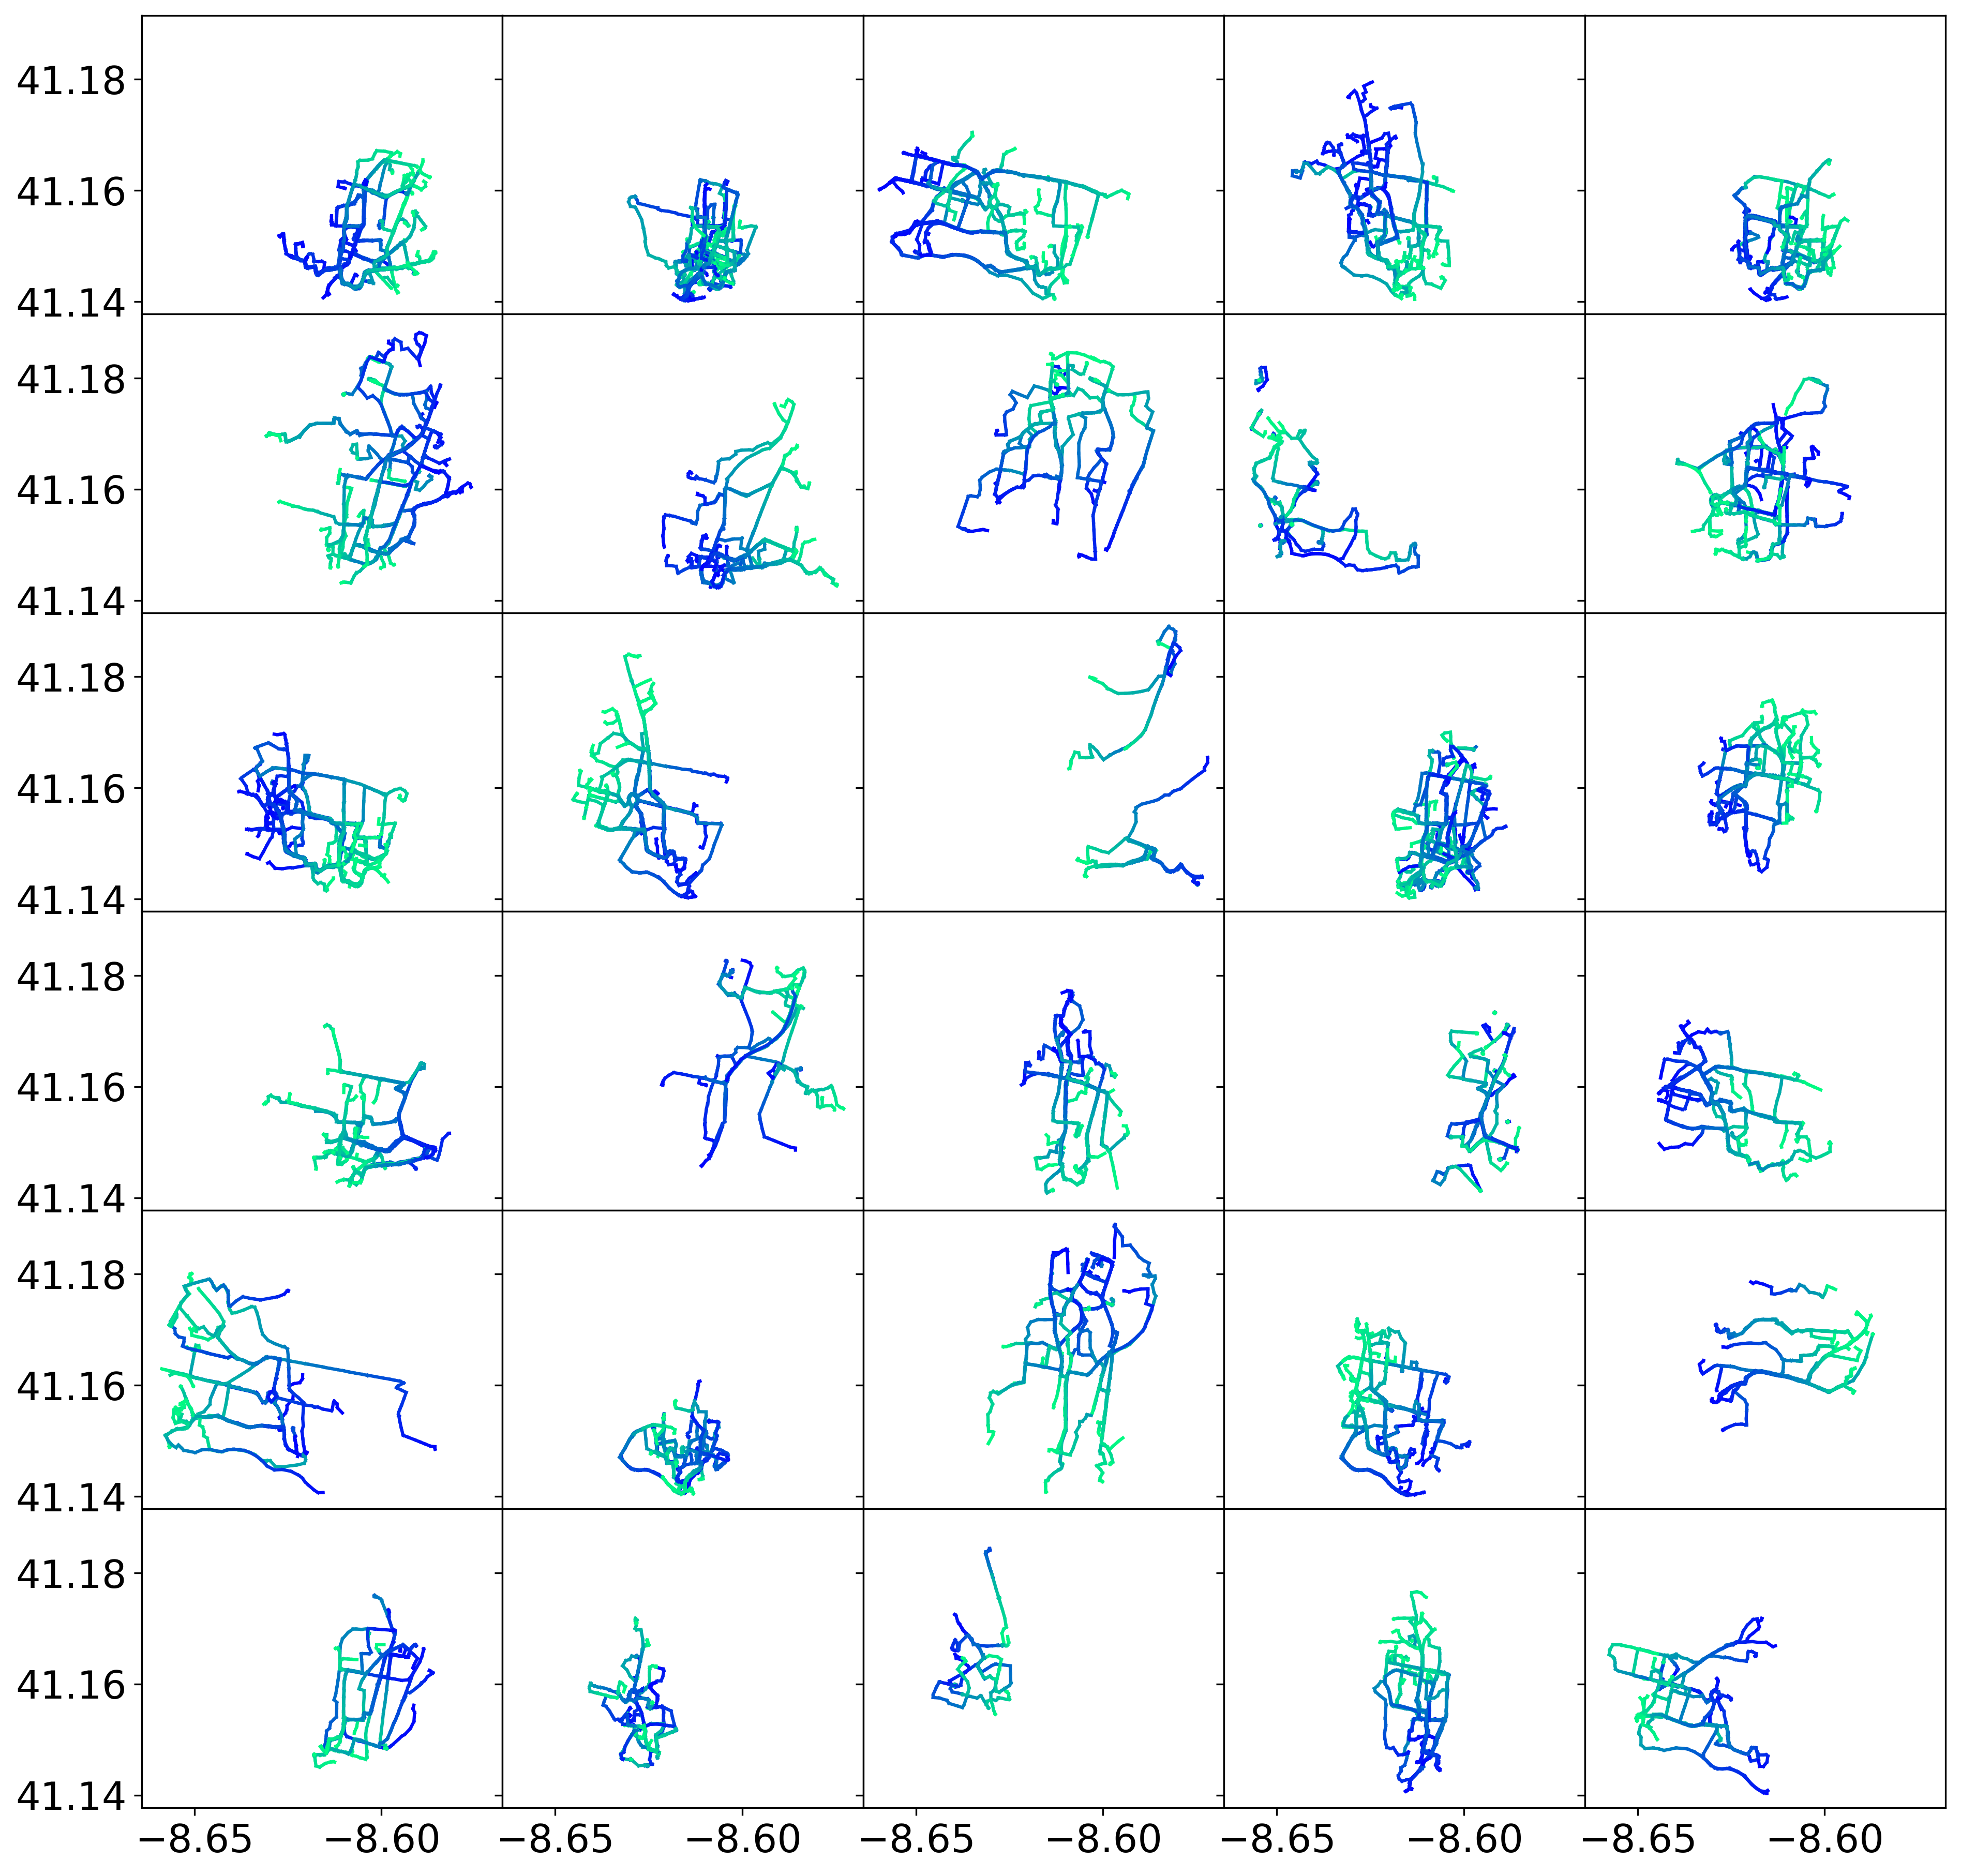

In [5]:
#Porto Frechet
PortoFRE = HCA("Porto", PORTO_TRUE_SIMS_FRE, 30 )
PortoFRE.plot_clusters("Porto - Frechet")

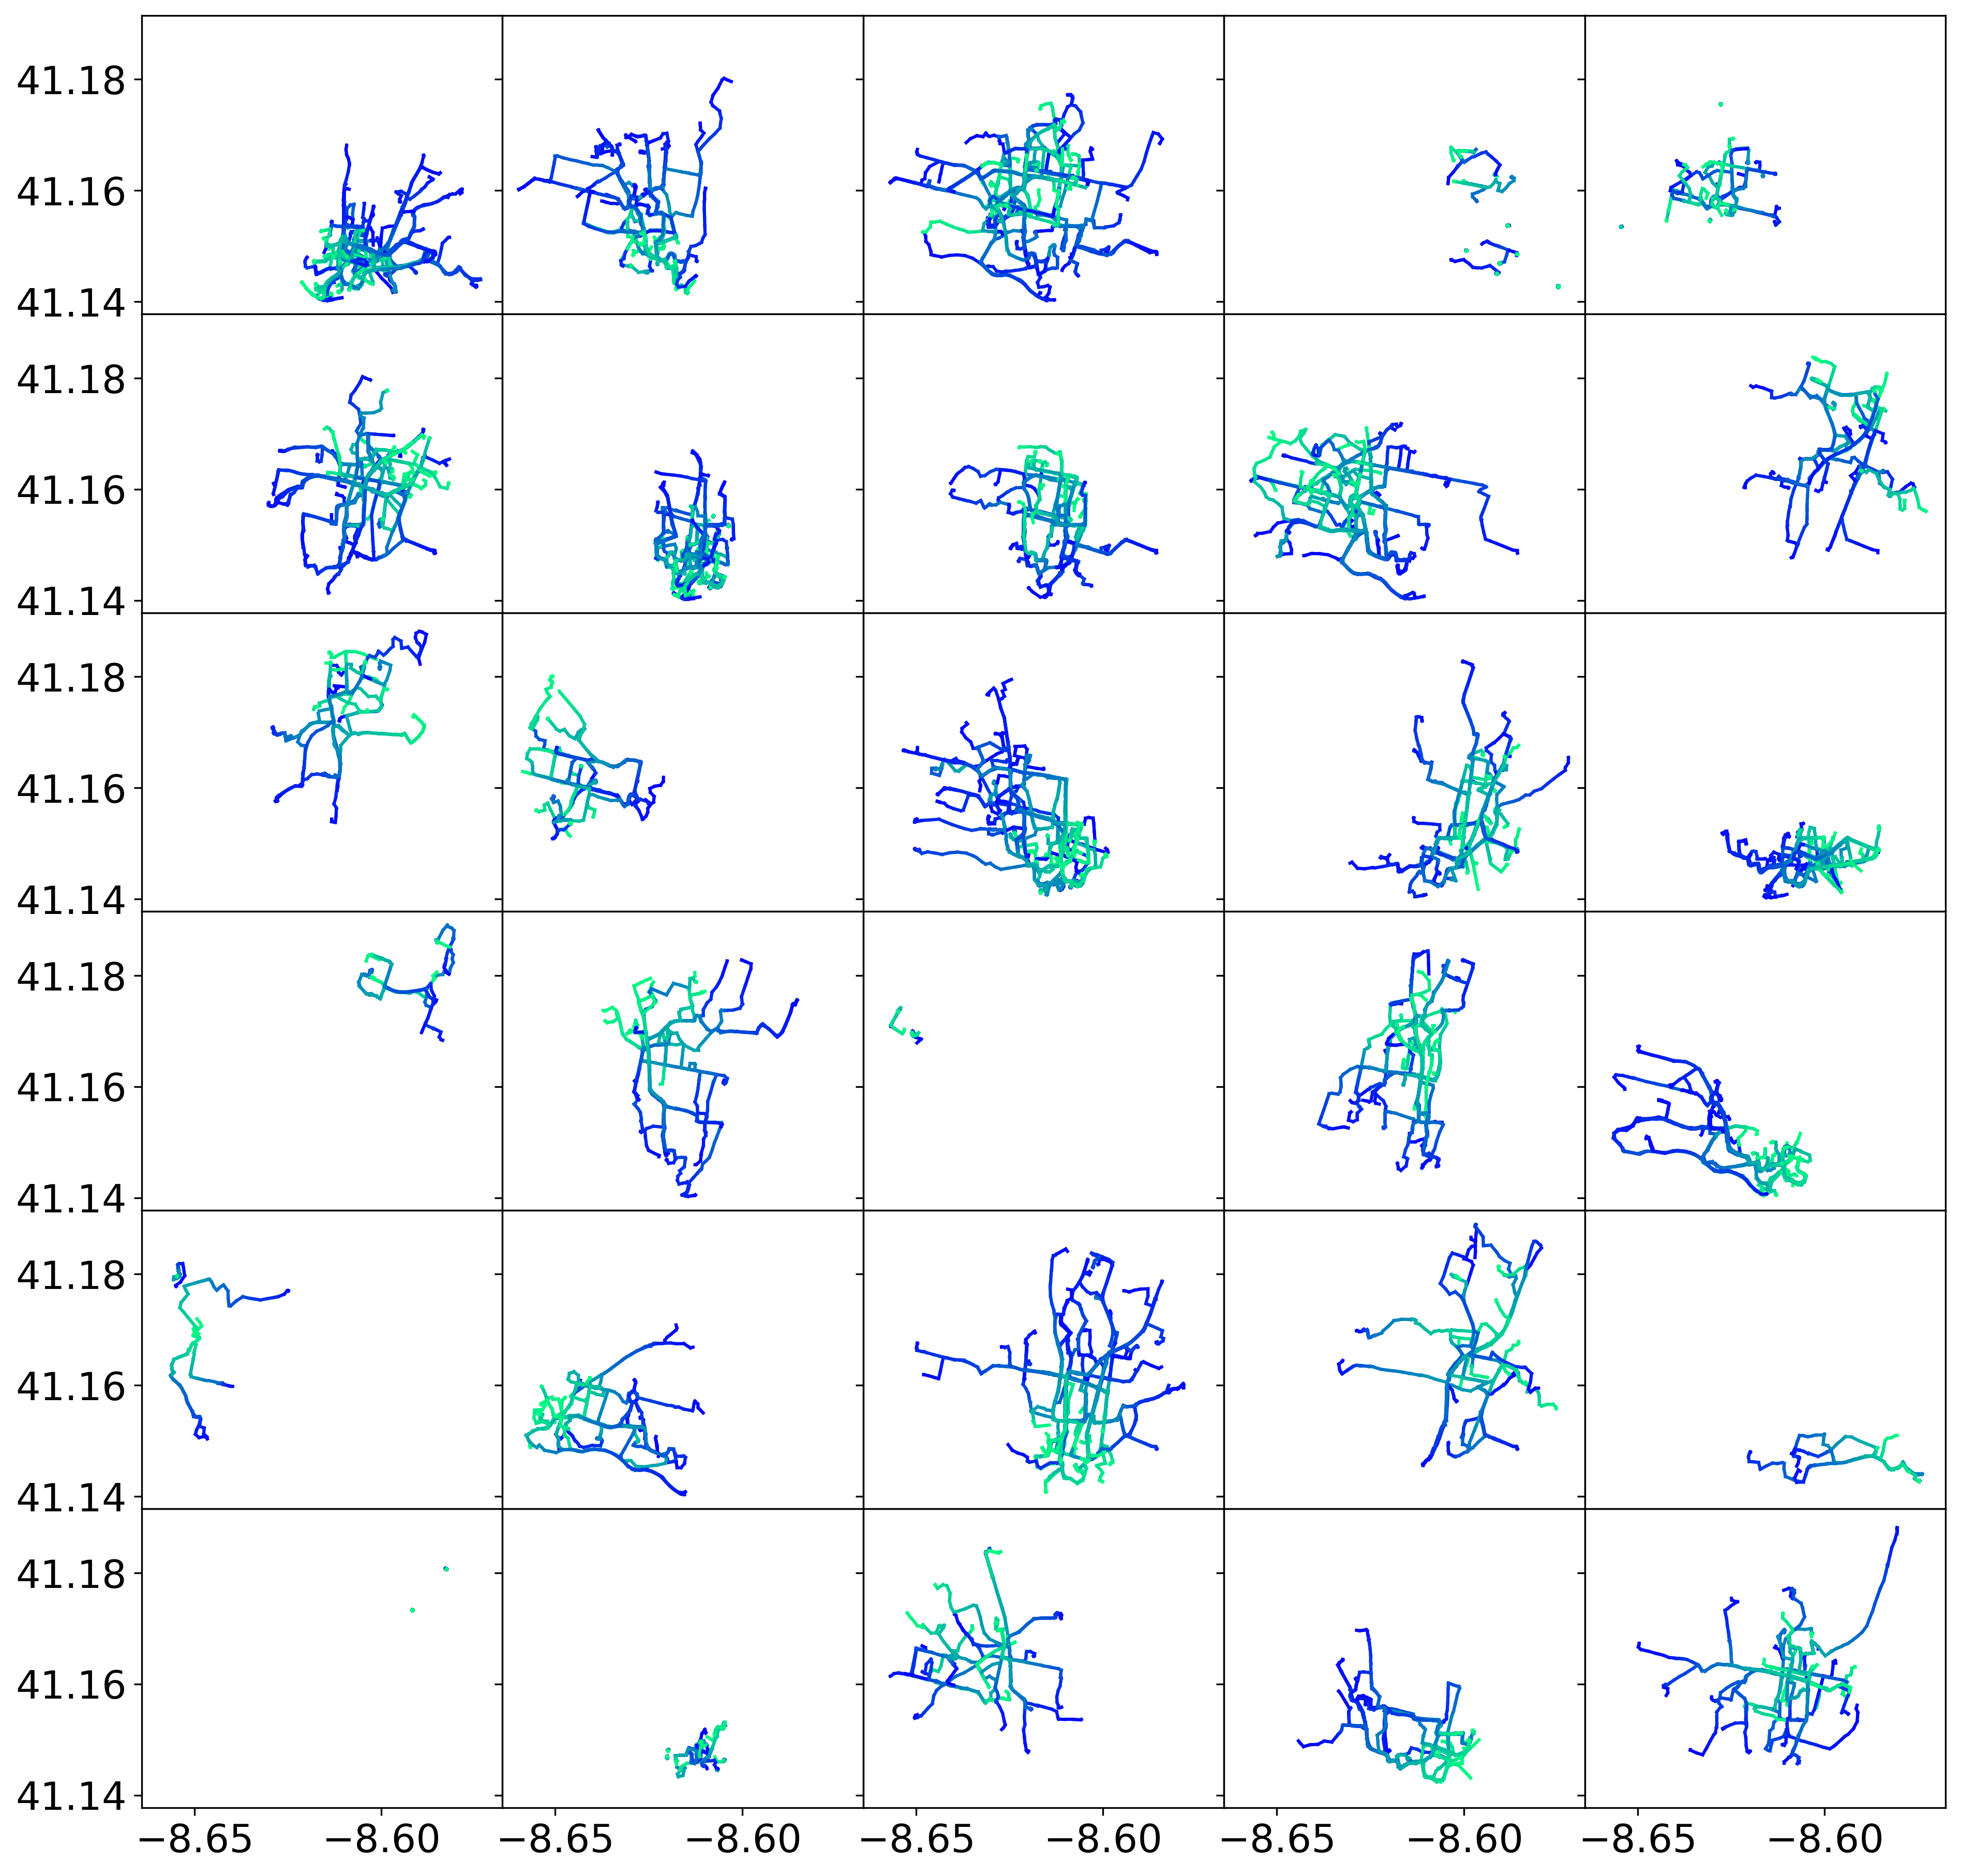

In [6]:
# Porto Grid similarities
PortoGrid = HCA("Porto", PORTO_GRID_SIMS, 30 )
PortoGrid.plot_clusters("Porto - Grid")

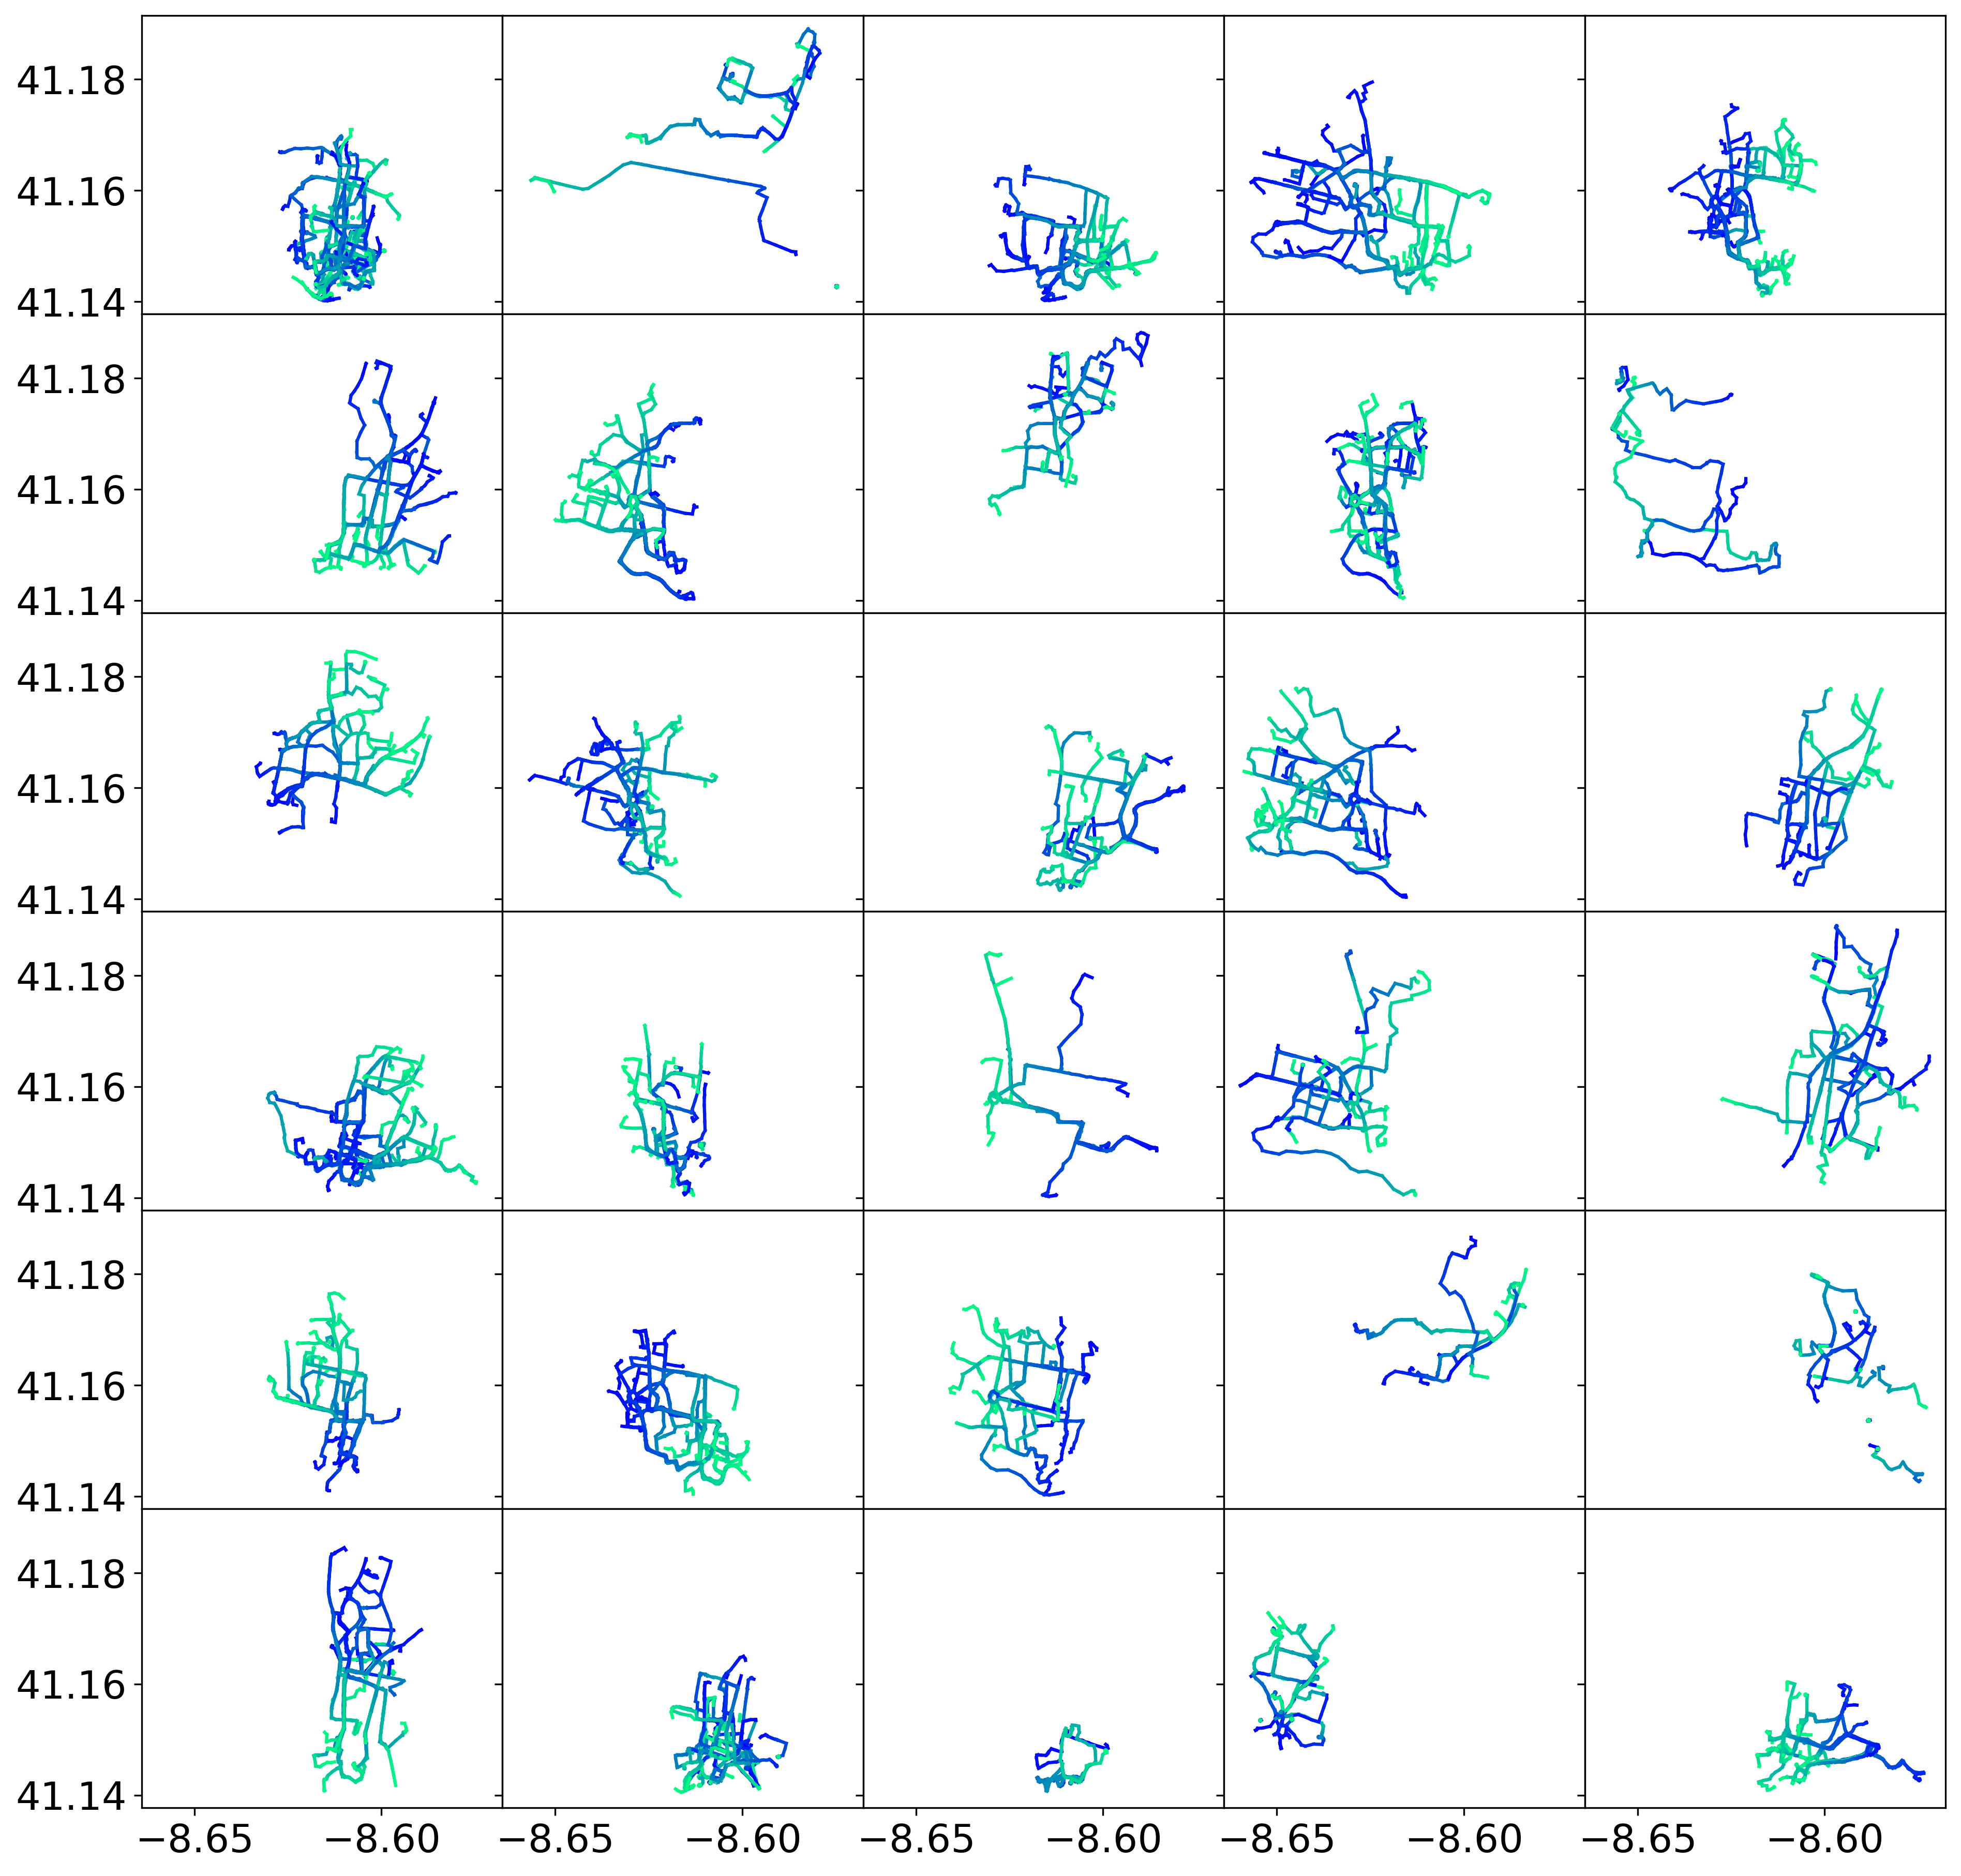

In [7]:
# Porto Disk similarities
PortoDisk = HCA("Porto", PORTO_DISK_SIMS, 30 )
PortoDisk.plot_clusters("Porto - Disk")

In [8]:
# Finally, generating the Davies bould index for each clustering
ptd = HCA("Porto", PORTO_TRUE_SIMS_DTW, 30 )
ptf = HCA("Porto", PORTO_TRUE_SIMS_FRE, 30 )
phg = HCA("Porto", PORTO_GRID_SIMS, 30 )
phd = HCA("Porto", PORTO_DISK_SIMS, 30 )

Porto_DTW_db = DB.davies_bouldin(ptd.distances, ptd.clusters)
Porto_FRE_db = DB.davies_bouldin(ptf.distances, ptf.clusters)
Porto_GRID_db = DB.davies_bouldin(phg.distances, phg.clusters)
Porto_DISK_db = DB.davies_bouldin(phd.distances, phd.clusters)
Porto_GRID_db_dtw = DB.davies_bouldin(ptd.distances, phg.clusters)
Porto_DISK_db_fre = DB.davies_bouldin(ptf.distances, phd.clusters)
Porto_GRID_db_fre = DB.davies_bouldin(ptf.distances, phg.clusters)
Porto_DISK_db_dtw = DB.davies_bouldin(ptd.distances, phd.clusters)

print("DB, WL, BL")
print("P_DTW", Porto_DTW_db)
print("P_FRE", Porto_FRE_db)
print("P_GrH", Porto_GRID_db)
print("P_DiH", Porto_DISK_db)

print("\n Computing Davies Bouldin from the hashes clusters against their true similarities: ")
print("P_GrH_DTW", Porto_GRID_db_dtw)
print("P_GrH_FRE", Porto_GRID_db_fre)
print("P_DiH_DTW", Porto_DISK_db_dtw)
print("P_DiH_FRE", Porto_DISK_db_fre)

# Rand index
RI_P_GRID_DTW = mcs.rand_score(ptd.clusters, phg.clusters)
RI_P_GRID_FRE = mcs.rand_score(ptf.clusters, phg.clusters)
RI_P_DISK_DTW = mcs.rand_score(ptd.clusters, phd.clusters)
RI_P_DISK_FRE = mcs.rand_score(ptf.clusters, phd.clusters)

print("\nComputing the rand index: ")
print("P_GrH_DTW", RI_P_GRID_DTW)
print("P_GrH_FRE", RI_P_GRID_FRE)
print("P_DiH_DTW", RI_P_DISK_DTW)
print("P_DiH_FRE", RI_P_DISK_FRE)


DB, WL, BL
P_DTW (0.00997446884818902, 23.031574787336385, 76.96842521266362)
P_FRE (0.01551490773455641, 31.76144605287557, 68.23855394712443)
P_GrH (0.015587551744501974, 31.862775417291584, 68.13722458270843)
P_DiH (0.017678696369446363, 34.65593600656717, 65.34406399343284)

 Computing Davies Bouldin from the hashes clusters against their true similarities: 
P_GrH_DTW (0.016086586486740145, 32.55081462152851, 67.44918537847148)
P_GrH_FRE (0.02204655350592536, 39.80967597481005, 60.190324025189945)
P_DiH_DTW (0.01468304963692948, 30.579249682390465, 69.42075031760953)
P_DiH_FRE (0.01753801709468189, 34.47523399147583, 65.52476600852417)

Computing the rand index: 
P_GrH_DTW 0.9136356356356357
P_GrH_FRE 0.9311191191191192
P_DiH_DTW 0.924904904904905
P_DiH_FRE 0.939985985985986
